## Import des librairies ##

In [13]:
#Imports librairies de base
import numpy as np
import pandas as pd

#Affichage de Graphes
from IPython.display import Markdown, display, HTML
import matplotlib.pyplot as plt

#Information Mutuelle
from sklearn.feature_selection import mutual_info_regression


## 1. Lecture des données ##

1.1 Charger les données d'apprentissage (Data/passagers.csv) dans un DataFrame nommé train. Afficher 10 exemples.

In [15]:
train = pd.read_csv('/content/sample_data/passagers.csv', index_col=0)
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


1.2 Charger les données d'apprentissage (Data/test.csv) dans un Dataframe nommé test. Afficher 10 exemples.

In [16]:
test = pd.read_csv('/content/sample_data/test.csv', index_col=0)
test.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C


1.3 Afficher les informations des deux DataFrames train et Test.

In [41]:
print("=== Infos DataFrame Train ===\n")
train.info()
print("\nLignes, Colonnes: ", train.shape)
print()
print("-" * 40)
print()
print("=== Infos DataFrame Test ===\n")
test.info()
print("\nLignes, Colonnes: ", test.shape)

print("\n=== Describe Train ===")
display(train.describe().T)
print("\n=== Describe Test ===")
display(test.describe().T)

=== Infos DataFrame Train ===

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB

Lignes, Colonnes:  (891, 11)

----------------------------------------

=== Infos DataFrame Test ===

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292



=== Describe Test ===


,count,mean,std,min,25%,50%,75%,max
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.0,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.0,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.0,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.0,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.5,512.3292


1.4 Calculer le taux global de survie

In [36]:
taux_survie = train['Survived'].mean()
print("Taux global de survie : {:.2f}%".format(taux_survie * 100))

Taux global de survie : 38.38%


#### Question 1 : Quel Travail voyez-vous pour que les données soient prêtes à faire tourner dans un modèle ?


Pour que les données soient prêtes il faudra :
- Nettoyer les données :
  - Gérer les valeurs manquantes
  - Supprimer les colonnes inutiles ou incomplètes
  - Vérifier et corriger les valeurs aberrantes (outliers)
- Transformer les données :
  - Convertir les variables catégorielles en données numériques (encodage)
  - Uniformiser les échelles pour les variables numériques
- Créer de nouvelles features :
  - Pour améliorer l'apprentissage (taille de la famille, nom du passager Mr, Mrs, etc..)

#### Question 2 : Quelle différence y-a-t'il entre les données train et les données test ?


Leurs rôles et leurs contenus sont différents :
- Le fichier train a une colonne supplémentaire (Survived), c'est notre variable cible, ou le label
- Le fichier test sert à évaluer le modèle à partir du jeu d'entrainement
- Les deux fichiers couvrent des passagers différents du Titanic. On a une répartition classique entre apprentissage et évaluation : d'environ 70% pour train et 30 % pour test.


#### Question 3 : Quel est le rôle de ces deux sets de données ?


Les deux jeux de données ont des rôles complémentaires :
- Train sert à apprendre au modèle à prédire le label (Survived) à l'aide des caractéristiques des passagers
- Test sert à évaluer la qualité du modèle, sa capacité à généraliser sur des données nouvelles.

Train : apprentissage du modèle
Test : Evaluation de ses performances

## 2. Analyse des features

2.1 Analyser l'effet de la variable Classe sur le taux de survie, en affichant le % de survie par classe

In [44]:
print("=== Taux de survie par Classe ===\n")
survie_par_classe = train.groupby('Pclass')['Survived'].mean() * 100
print(survie_par_classe.round(2))

=== Taux de survie par Classe ===

Pclass
1    62.96
2    47.28
3    24.24
Name: Survived, dtype: float64
Plus la classe est élevée, plus la probabilité de survie augmente


Plus la classe est élevée, plus la probabilité de survie augmente

2.2 Analyser l'effet de la variable Genre (Sex) sur le taux de survie, en affichant le % de survie par classe

In [45]:
print("=== Taux de survie par Sexe ===\n")
survie_par_genre = train.groupby('Sex')['Survived'].mean() * 100
print(survie_par_genre.round(2))

=== Taux de survie par Sexe ===

Sex
female    74.20
male      18.89
Name: Survived, dtype: float64


On voit clairement que les femmes présentent un taux de survie bien plus élevé que les hommes

2.3 Calculer une nouvelle colonne FamilySize contenant la taille de la famille, pour les DataFrame train et Test. Afficher pour 10 exemples l'Id du passager, le nom, l'age, le sexe et la taille de la famille.

In [47]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

print("=== Exemples avec taille de la famille ===\n")
display(train[['Name', 'Age', 'Sex', 'FamilySize']].head(10))


=== Exemples avec taille de la famille ===



,Name,Age,Sex,FamilySize
PassengerId,,,,
1,"Braund, Mr. Owen Harris",22.0,male,2
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female,2
3,"Heikkinen, Miss. Laina",26.0,female,1
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female,2
5,"Allen, Mr. William Henry",35.0,male,1
6,"Moran, Mr. James",NaN,male,1
7,"McCarthy, Mr. Timothy J",54.0,male,1
8,"Palsson, Master. Gosta Leonard",2.0,male,5
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,female,3


2.4 Visualisez le nombre de personnes et le taux de survie par taille de famille.

,Nb_Passagers,Taux_Survie
FamilySize,,
1,537,30.353818
2,161,55.279503
3,102,57.843137
4,29,72.413793
5,15,20.000000
6,22,13.636364
7,12,33.333333
8,6,0.000000
11,7,0.000000


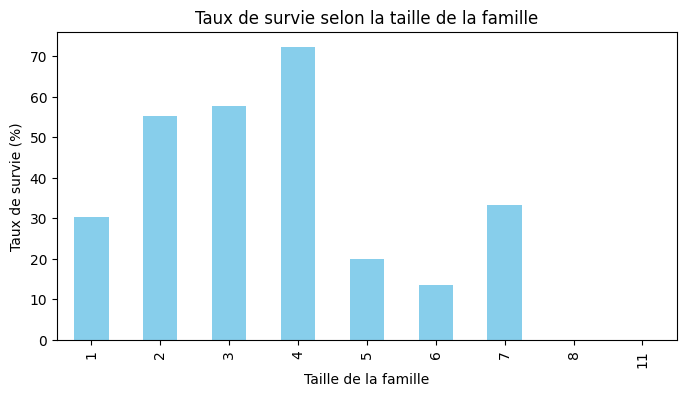

In [48]:
family_stats = train.groupby('FamilySize')['Survived'].agg(['count', 'mean'])
family_stats.rename(columns={'count': 'Nb_Passagers', 'mean': 'Taux_Survie'}, inplace=True)
family_stats['Taux_Survie'] *= 100

display(family_stats)

# Visualisation
family_stats.plot(kind='bar', y='Taux_Survie', legend=False, figsize=(8,4), color='skyblue')
plt.title("Taux de survie selon la taille de la famille")
plt.xlabel("Taille de la famille")
plt.ylabel("Taux de survie (%)")
plt.show()


2.5 Calculer une nouvelle colonne IsAlone indiquant si le passager est seul ou pas, pour les DataFrame train et Test. Afficher pour 10 exemples l'Id du passager, le nom, l'age, le sexe et le status IsAlone.

2.6 Visualisez le nombre de personnes et le taux de survie par statut seul ou pas.

2.7 Calculer l'information mutuelle sur les données train.

Attention : Il y a des données continues et des données discrètes

Ignorer les colonnes Name, Ticket et Cabin

2.8 Afficher dans un graphique les scores d'information mutuelle par feature

### Question 1 : La variable Classe est-elle utile pour prévoir la survie ? Pourquoi ?



### Question 2 : Même question pour la variable Sex


### Question 3 : Comment traiter le variables liées à la famille du passager ?





## 3. Traitement des données manquantes (à faire sur les données Train et Test)

3.1 La variable "Embarked" possède des valeurs nulles, compléter par la valeur majoritaire (S).

3.2 Afficher l'influence du port d'embarquement sur la Survie

3.3 La variable "Fare" (prix du ticket) possède des valeurs manquantes. Remplacer ces valeurs par la valeur médiane.

3.4 Créer une variable CategoricalFare Découpant la valeur de ticket en 4 catégories de tailles à peu près égales.

3.5 Analyser l'effet de ces catégories de prix de ticket sur la survie.

3.6 Combien de valeurs d'Age manquent ? Complète par des valeurs entières aléatoires entre (moyenne - écart type) et (moyenne + écart type).

3.7 Créer une variable CategoricalAge Découpant la valeur d'age en 5 tranches d'age de même taille.

3.8 Analyser l'effet de ces catégories d'age sur la survie.

### Question 1 : Classer les variables par ordre d'intérêt

## 4 : Traitement de features complexes

4.1 : Le nom permet de retrouver le titre du passager. Trouver les titres lorsqu'ils existent.

4.2 : En utilisant la fonction pandas crosstab, afficher pour train le nombre d'occurences par titres (en ligne) et par sexe (en colonne)

4.3 :
Remplacer 'Melle et 'Ms' par 'Miss'

Remplacer 'Mme' par 'Mrs'

Creer une valeur "Rare" pour les autres titres avec moins de 10 occurences.

Calculer ensuite le taux de survie par titre

## 5. Mise en forme des données non numériques

5.1 Attribuer une valeur numérique au Genre. Par exemple 0 pour 'female' et 1 pour 'male'

5.2 : Attribuer une valeur pour les possibilités de la variable "Title" ('Master','Miss','Mr','Mrs','Rare')

5.3 Remplacer les titres manquant par 0, et attribuer à la colonne le type entier

5.4 Attribuer une valeur numérique aux 4 catégories de la variable Fare

5.5 Attibuer une valeur numérique au Port d'embarquement (Embarked)

5.6 Supprimer les features inutiles

5.7 Afficher les infos pour les deux datasets

5.8 Sauver les deux datasets dans des fichier csv. Eviter d'écrire un index (n° de ligne)